# Exercise 5:  The perceptron

In this notebook you will explore the perceptron algorithm.  For all questions use the scikit-learn [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) and use the implementation of the perceptron we looked at in class.


### Part 1: number of epochs

Explore the accuracy of the perceptron on the breast cancer dataset while varying the number of epochs that the perceptron is trained.  Measure accuracy on both the training and test sets and plot the results as a function of number of epochs (best to use a logarithmic axis for the x-axis, using plt.semilogx).  What can you conclude?


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class perceptron :
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, iterations=100, learning_rate=0.2, 
                 plot_data=False, random_w=False, seed=42) :
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.plot_data = plot_data
        self.random_w = random_w
        self.seed = seed
  
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        
        if self.random_w :
            rng = np.random.default_rng(self.seed)
            self.w = rng.uniform(-1 , 1, len(X[0]))
            print("initialized with random weight vector")
        else :
            self.w = np.zeros(len(X[0]))
            print("initialized with a zeros weight vector")
        self.wold = self.w
        converged = False
        iteration = 0
        while (not converged and iteration <= self.iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.wold = self.w
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
                    if self.plot_data:
                        self.plot_update(X, y, i)
            iteration += 1
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iteration)
 
    def decision_function(self, x) :
        return np.dot(x, self.w)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
        scores = np.dot(X, self.w)
        return np.sign(scores)
    
    def plot_update(self, X, y, ipt) :
        fig = plt.figure(figsize=(4,4))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.arrow(0,0,self.w[0],self.w[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='darkred')
        plt.arrow(0,0,self.wold[0],self.wold[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='orange')
        anew = -self.w[0]/self.w[1]
        pts = np.linspace(-1,1)
        plt.plot(pts, anew*pts, color='darkred')
        if self.wold[1] != 0 :
            aold = -self.wold[0]/self.wold[1]
            plt.plot(pts, aold*pts, color='orange')
        plt.title("in orange:  old w; in red:  new w")
        cols = {1: 'g', -1: 'b'}
        for i in range(len(X)): 
            plt.plot(X[i][0], X[i][1], cols[y[i]]+'o', alpha=0.6,markersize=5) 
        plt.plot(X[ipt][0], X[ipt][1], 'ro', alpha=0.2,markersize=15)
 

Perceptron with  2  iterations:
initialized with a zeros weight vector
accuracy:  0.6023391812865497 

Perceptron with  5  iterations:
initialized with a zeros weight vector
accuracy:  0.9298245614035088 

Perceptron with  10  iterations:
initialized with a zeros weight vector
accuracy:  0.9298245614035088 

Perceptron with  20  iterations:
initialized with a zeros weight vector
accuracy:  0.9239766081871345 

Perceptron with  40  iterations:
initialized with a zeros weight vector
accuracy:  0.8538011695906432 

Perceptron with  100  iterations:
initialized with a zeros weight vector
accuracy:  0.8362573099415205 

Perceptron with  200  iterations:
initialized with a zeros weight vector
accuracy:  0.8654970760233918 

Perceptron with  500  iterations:
initialized with a zeros weight vector
accuracy:  0.8421052631578947 

Perceptron with  1000  iterations:
initialized with a zeros weight vector
accuracy:  0.7485380116959064 

Perceptron with  2000  iterations:
initialized with a zeros w

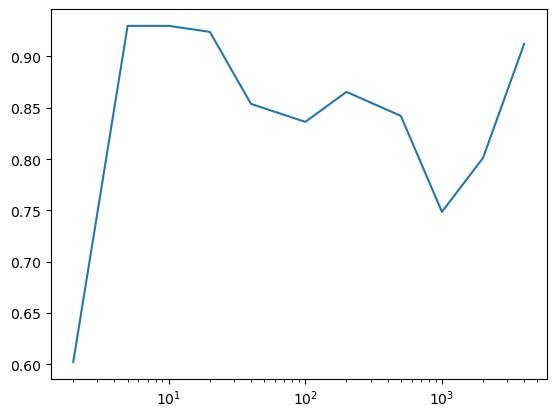

In [12]:
num_epochs = [2, 5, 10, 20, 40, 100, 200, 500, 1000, 2000, 4000]
data = load_breast_cancer()
X = data.data
y = data.target

y = y * 2 - 1
X = np.hstack([X, np.ones((len(X), 1))])

results = np.array([])

for e in num_epochs:
    print("Perceptron with ", e, " iterations:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    p = perceptron(iterations = e, learning_rate = 0.1)
    p.fit(X_train, y_train)
    y_pred = p.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    print('accuracy: ', accuracy, "\n")
    results = np.append(results, [accuracy])

plt.semilogx(num_epochs, results);

### Part 2

Can you tell if the breast cancer dataset is linearly separable?

I would guess that the data is not linearly separable since we never reach convergence even on the longest # of epochs. This is a high dimension (30) space, which may be difficult for the perceptron algorithm to classify the dataset correctly.

In [6]:
# and if you want to have some code

### Part 3: the learning rate

How does the learning rate affect the accuracy of the perceptron?
To address this question, plot training and test accuracy as a function of the learning rate.
Again, use plt.semilogx for the x-axis to have a logarithmic scale for the x-axis.

Perceptron with  1e-05  learning rate:
initialized with a zeros weight vector
accuracy:  0.8362573099415205 

Perceptron with  0.001  learning rate:
initialized with a zeros weight vector
accuracy:  0.8362573099415205 

Perceptron with  0.01  learning rate:
initialized with a zeros weight vector
accuracy:  0.8362573099415205 

Perceptron with  0.1  learning rate:
initialized with a zeros weight vector
accuracy:  0.8362573099415205 

Perceptron with  1  learning rate:
initialized with a zeros weight vector
accuracy:  0.8362573099415205 



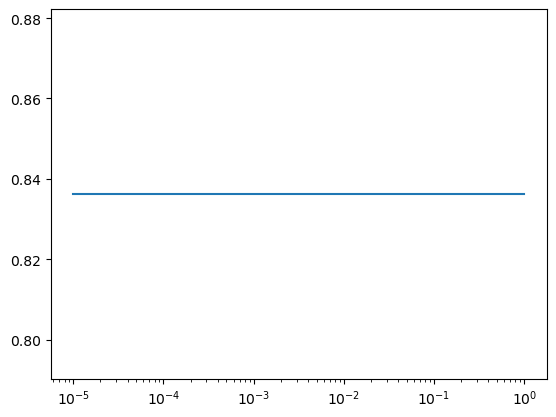

In [47]:
learning_rates = [0.00001, 0.001, 0.01, 0.1, 1]


results = np.array([])

for l in learning_rates:
    print("Perceptron with ", l, " learning rate:")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
    p = perceptron(learning_rate = l)
    p.fit(X_train, y_train)
    y_pred = p.predict(X_test)
    accuracy = np.mean(y_test == y_pred)
    print('accuracy: ', accuracy, "\n")
    results = np.append(results, [accuracy])

plt.semilogx(learning_rates, results);

I would say that the learning rate has no effect on the accuracy of the perceptron, but I may have coded it incorrectly and am not getting the results I am supposed to be seeing.